In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.decomposition import PCA


from skimage.io import imread, imshow, show, imshow_collection
from skimage.transform import resize, rescale, rotate

warnings.filterwarnings('ignore')

# Load Data

In [2]:
data_train_1 = pickle.load(open("data/data_train_flatten_batch_1.pkl", "rb"))
data_train_2 = pickle.load(open("data/data_train_flatten_batch_2.pkl", "rb"))
labels_train_1 = pickle.load(open("data/labels_train_batch_1.pkl", "rb"))
labels_train_2 = pickle.load(open("data/labels_train_batch_2.pkl", "rb"))

data_train = np.concatenate((data_train_1, data_train_2))
labels_train = np.concatenate((labels_train_1, labels_train_2))

data_test = pickle.load(open("data/data_test_flatten.pkl", "rb"))
labels_test = pickle.load(open("data/labels_test.pkl", "rb"))

# Shuffle train set
data_train, labels_train = shuffle(data_train, labels_train, random_state=25)

# Scale Data

In [3]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(data_train)
X_test_std = scaler.transform(data_test)

# PCA
We will use a 95% PCA

In [5]:
print("original number of features:", X_train_std.shape[1])
pca = PCA(0.95)
pca.fit(X_train_std)
print("Number of pricipal components:", pca.n_components_)

X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

original number of features: 3072
Number of pricipal components: 221


# Train Model

In [6]:
m = KNeighborsClassifier(n_jobs=4)

parameters = [{
    "n_neighbors": range(3, 25),
    "weights": ["uniform", "distance"]
}]

grid_search = GridSearchCV(m, parameters, verbose=3, scoring="f1_macro")
grid_search.fit(X_train_pca, labels_train)
model = grid_search.best_estimator_

Fitting 5 folds for each of 44 candidates, totalling 220 fits


In [9]:
print("Model optimal parameters".upper())
print("n_neighbors:", model.get_params()["n_neighbors"])
print("weights:", model.get_params()["weights"])

MODEL OPTIMAL PARAMETERS
n_neighbors: 6
weights: distance
221


# Test Model

In [11]:
predictions = model.predict(X_test_pca)

accuracy = accuracy_score(labels_test, predictions)
precision = precision_score(labels_test, predictions, average="macro")
recall = recall_score(labels_test, predictions, average="macro")
f1_macro = f1_score(labels_test, predictions, average="macro")

print("Accuracy score: {:.4f}%\nPrecision macro: {:.4f}%\nRecall macro: {:.4f}%\nF1 macro: {:.4f}%".format(accuracy*100, precision*100, recall*100, f1_macro*100))

Accuracy score: 0.3811


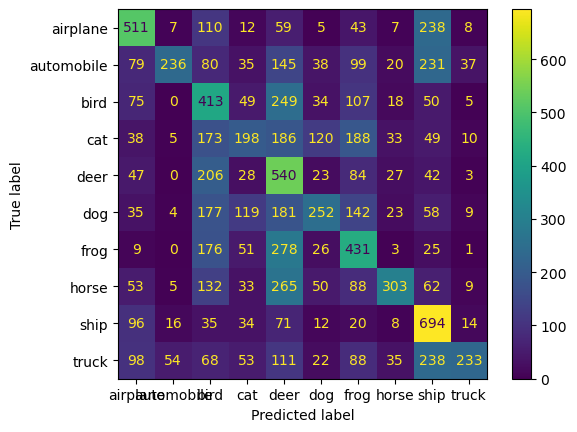

In [12]:
cm = confusion_matrix(labels_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

# Save Model

In [13]:
model_file_name = "KNN_32x32_PCA.pkl"
pickle.dump(model, open(model_file_name, "wb"))

# Black And White

## Load data

In [14]:
train_batches = []
labels_batches = []

for i in [1, 2, 3, 4, 5]:
    data_filepath = "data/data_train_bw_flatten_batch_" + str(i) + ".pkl"
    labels_filepath = "data/labels_train_bw_batch_" + str(i) + ".pkl"
    train_batches.append(pickle.load(open(data_filepath, "rb")))
    labels_batches.append(pickle.load(open(labels_filepath, "rb")))
    
data_train_bw = np.concatenate(train_batches)
labels_train_bw = np.concatenate(labels_batches)

data_test_bw = pickle.load(open("data/data_test_bw_flatten.pkl", "rb"))
labels_test_bw = pickle.load(open("data/labels_test_bw.pkl", "rb"))

# Shuffle train set
data_train_bw, labels_train_bw = shuffle(data_train_bw, labels_train_bw, random_state=25)

## Scale data

In [15]:
scaler = StandardScaler()

X_train_std_bw = scaler.fit_transform(data_train_bw)
X_test_std_bw = scaler.transform(data_test_bw)

## PCA
We will use a 95% PCA

In [16]:
del pca
print("original number of features:", X_train_std_bw.shape[1])
pca = PCA(0.95)
pca.fit(X_train_std_bw)
print("Number of pricipal components:", pca.n_components_)

X_train_bw_pca = pca.transform(X_train_std_bw)
X_test_bw_pca = pca.transform(X_test_std_bw)

original number of features: 1024
Number of pricipal components: 163


## Train model

In [17]:
m = KNeighborsClassifier(n_jobs=4)

parameters = [{
    "n_neighbors": range(3, 25),
    "weights": ["uniform", "distance"]
}]

grid_search = GridSearchCV(m, parameters, verbose=3, scoring="f1_macro")
grid_search.fit(X_train_bw_pca, labels_train_bw)
model_bw = grid_search.best_estimator_

Fitting 5 folds for each of 44 candidates, totalling 220 fits
[CV] END ...........n_jobs=4, n_neighbors=3, weights=uniform; total time=  15.0s
[CV] END ...........n_jobs=4, n_neighbors=3, weights=uniform; total time=  14.4s
[CV] END ...........n_jobs=4, n_neighbors=3, weights=uniform; total time=  14.0s
[CV] END ...........n_jobs=4, n_neighbors=3, weights=uniform; total time=  13.7s
[CV] END ...........n_jobs=4, n_neighbors=3, weights=uniform; total time=  13.6s
[CV] END ..........n_jobs=4, n_neighbors=3, weights=distance; total time=  13.7s
[CV] END ..........n_jobs=4, n_neighbors=3, weights=distance; total time=  13.5s
[CV] END ..........n_jobs=4, n_neighbors=3, weights=distance; total time=  13.5s
[CV] END ..........n_jobs=4, n_neighbors=3, weights=distance; total time=  13.5s
[CV] END ..........n_jobs=4, n_neighbors=3, weights=distance; total time=  13.7s
[CV] END ...........n_jobs=4, n_neighbors=4, weights=uniform; total time=  16.3s
[CV] END ...........n_jobs=4, n_neighbors=4, we

[CV] END ..........n_jobs=4, n_neighbors=13, weights=uniform; total time=  15.6s
[CV] END ..........n_jobs=4, n_neighbors=13, weights=uniform; total time=  15.2s
[CV] END ..........n_jobs=4, n_neighbors=13, weights=uniform; total time=  15.3s
[CV] END ..........n_jobs=4, n_neighbors=13, weights=uniform; total time=  15.4s
[CV] END .........n_jobs=4, n_neighbors=13, weights=distance; total time=  15.4s
[CV] END .........n_jobs=4, n_neighbors=13, weights=distance; total time=  15.5s
[CV] END .........n_jobs=4, n_neighbors=13, weights=distance; total time=  14.9s
[CV] END .........n_jobs=4, n_neighbors=13, weights=distance; total time=  15.2s
[CV] END .........n_jobs=4, n_neighbors=13, weights=distance; total time=  15.5s
[CV] END ..........n_jobs=4, n_neighbors=14, weights=uniform; total time=  15.8s
[CV] END ..........n_jobs=4, n_neighbors=14, weights=uniform; total time=  15.3s
[CV] END ..........n_jobs=4, n_neighbors=14, weights=uniform; total time=  15.0s
[CV] END ..........n_jobs=4,

[CV] END ..........n_jobs=4, n_neighbors=23, weights=uniform; total time=  15.3s
[CV] END ..........n_jobs=4, n_neighbors=23, weights=uniform; total time=  15.6s
[CV] END .........n_jobs=4, n_neighbors=23, weights=distance; total time=  19.1s
[CV] END .........n_jobs=4, n_neighbors=23, weights=distance; total time=  15.5s
[CV] END .........n_jobs=4, n_neighbors=23, weights=distance; total time=  15.1s
[CV] END .........n_jobs=4, n_neighbors=23, weights=distance; total time=  15.5s
[CV] END .........n_jobs=4, n_neighbors=23, weights=distance; total time=  15.3s
[CV] END ..........n_jobs=4, n_neighbors=24, weights=uniform; total time=  15.7s
[CV] END ..........n_jobs=4, n_neighbors=24, weights=uniform; total time=  15.5s
[CV] END ..........n_jobs=4, n_neighbors=24, weights=uniform; total time=  14.9s
[CV] END ..........n_jobs=4, n_neighbors=24, weights=uniform; total time=  15.3s
[CV] END ..........n_jobs=4, n_neighbors=24, weights=uniform; total time=  15.5s
[CV] END .........n_jobs=4, 

In [18]:
print("Model optimal parameters".upper())
print("n_neighbors:", model_bw.get_params()["n_neighbors"])
print("weights:", model_bw.get_params()["weights"])

MODEL OPTIMAL PARAMETERS
n_neighbors: 5
weights: distance


## Test model

In [19]:
predictions_bw = model_bw.predict(X_test_bw_pca)

accuracy_bw = accuracy_score(labels_test_bw, predictions_bw)
precision_bw = precision_score(labels_test_bw, predictions_bw, average="macro")
recall_bw = recall_score(labels_test_bw, predictions_bw, average="macro")
f1_macro_bw = f1_score(labels_test_bw, predictions_bw, average="macro")

print("Accuracy score: {:.4f}%\nPrecision macro: {:.4f}%\nRecall macro: {:.4f}%\nF1 macro: {:.4f}%".format(accuracy_bw*100, precision_bw*100, recall_bw*100, f1_macro_bw*100))

Accuracy score: 0.3381


[]

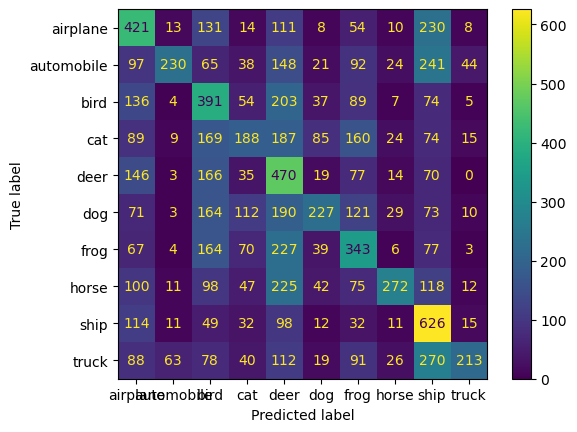

In [20]:
cm = confusion_matrix(labels_test_bw, predictions_bw, labels=model_bw.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_bw.classes_)
disp.plot()
plt.plot()

## Save model

In [21]:
model_file_name_bw = "KNN_32x32_bw_PCA.pkl"
pickle.dump(model_bw, open(model_file_name_bw, "wb"))